In [1]:
from matplotlib import pyplot as plt

In [12]:
for i in range(-10,10):
    print("%d -> %d" % (i,max(i,.0)))

-10 -> 0
-9 -> 0
-8 -> 0
-7 -> 0
-6 -> 0
-5 -> 0
-4 -> 0
-3 -> 0
-2 -> 0
-1 -> 0
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9


In [6]:
ls=[i for i in range(-10,10)]
ls

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

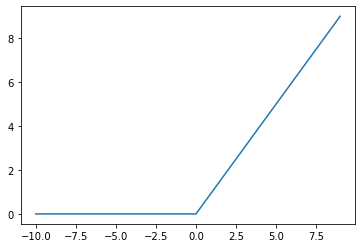

In [7]:
plt.plot(ls, [max(i, .0) for i in ls])

In [13]:
.25*.05+.1*.3+.35

0.39249999999999996

# Multilayer Perceptrons

## Regression

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [15]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [16]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [17]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
reg

MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=1)

In [19]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7633133194207418


## Classification

In [26]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9666666666666667


In [30]:
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.9427480916030534


In [29]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

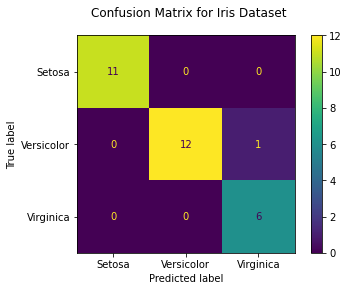

In [25]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()